In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [21]:
# Import data for training model
titanic = pd.read_csv('train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
# Check out the null values present in dataset
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [23]:
# Fill missing age with mean of available age
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)
titanic.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q


<Figure size 432x288 with 0 Axes>

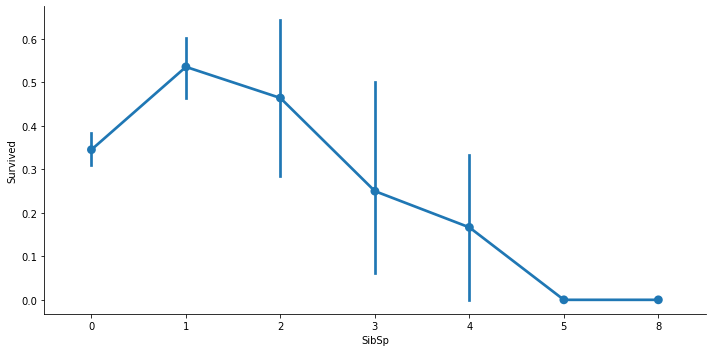

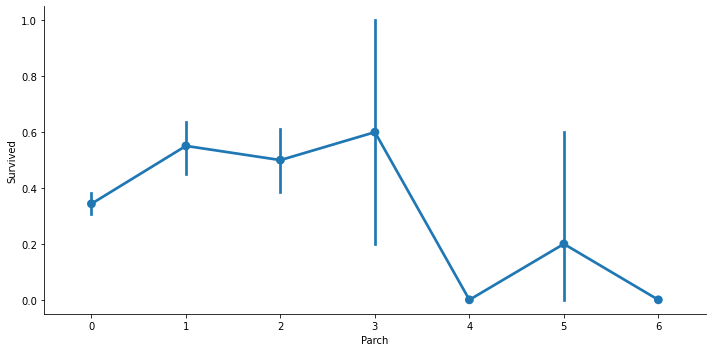

In [24]:
# See how SibSp & Parch impacts servived value
for i, col in enumerate(['SibSp','Parch']):
    plt.figure(i)
    sns.catplot(x=col, y='Survived', data=titanic, kind='point', aspect=2)

In [25]:
# Combine SibSp & Parch into Family_cnt and drop the columns
titanic['Family_cnt'] = titanic['SibSp'] + titanic['Parch']
titanic.drop(['PassengerId','SibSp','Parch'], axis=1, inplace=True)

In [26]:
titanic.head(5)

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


In [27]:
# Remove Cabin variable with a more appropriate value
titanic.groupby(titanic['Cabin'].isnull())['Survived'].mean()

Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64

In [28]:
titanic['Cabin_ind'] = np.where(titanic['Cabin'].isnull(), 0, 1)
titanic.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt,Cabin_ind
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0,0


In [29]:
# Change gender to number
gender = {'male': 0, 'female': 1}
titanic['Sex'] = titanic['Sex'].map(gender)
titanic.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt,Cabin_ind
0,0,3,"Braund, Mr. Owen Harris",0,22.0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,71.2833,C85,C,1,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,C123,S,1,1
4,0,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,NaN,S,0,0


In [30]:
# Drop unnecessary columns
titanic.drop(['Cabin','Embarked','Name','Ticket'], axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Family_cnt,Cabin_ind
0,0,3,0,22.0,7.2500,1,0
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,1,1
4,0,3,0,35.0,8.0500,0,0


In [31]:
titanic.to_csv('titanic_cleaned.csv', index=False)

In [32]:
# Create train test data
from sklearn.model_selection import train_test_split

titanic_cln = pd.read_csv('titanic_cleaned.csv')

features = titanic_cln.drop('Survived', axis=1)
labels = titanic_cln['Survived']

In [33]:
# Train & Test data split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [34]:
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset) / len(labels), 2))

0.6
0.2
0.2


In [35]:
# Write down data into files
X_train.to_csv('train_features.csv', index=False)
X_val.to_csv('val_features.csv', index=False)
X_test.to_csv('test_features.csv', index=False)

y_train.to_csv('train_labels.csv', index=False)
y_val.to_csv('val_labels.csv', index=False)
y_test.to_csv('test_labels.csv', index=False)

### Logistic Regression

In [40]:
# import Logistic Regression & GridSearchCV model
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings

warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [41]:
# import training data & features
train_features = pd.read_csv('train_features.csv')
train_labels = pd.read_csv('train_labels.csv', header=None)

lr = LogisticRegression()
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

def print_results(model):
    means = model.cv_results_['mean_test_score']
    stds = model.cv_results_['std_test_score']
    params = model.cv_results_['params']
    
    for mean, std, param in zip(means, stds, params):
        print('{} (+/-{}) for param {}'.format(round(mean,3), round(std,3), param))
        
train_labels.values.ravel()
cv = GridSearchCV(lr, parameters, cv=5)
cv.fit(train_features, train_labels.values.ravel())

print("BEST_SCORE :: ",cv.best_score_)

print_results(cv)

BEST_SCORE ::  0.7997178628107917
0.67 (+/-0.038) for param {'C': 0.001}
0.708 (+/-0.049) for param {'C': 0.01}
0.777 (+/-0.067) for param {'C': 0.1}
0.8 (+/-0.059) for param {'C': 1}
0.794 (+/-0.058) for param {'C': 10}
0.794 (+/-0.058) for param {'C': 100}
0.794 (+/-0.058) for param {'C': 1000}


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

In [ ]:
# save LogisticRegression as a pkl file
print(cv.best_estimator_)
joblib.dump(cv.best_estimator_,'LR_model.pkl')
print('LR_model.pkl saved.')

### Support Vector Machine

In [45]:
from sklearn.svm import SVC

svc = SVC()
parameters = {
    'kernel': ['linear','rbf'],
    'C': [0.1, 1, 10]
}

cv_svm = GridSearchCV(svc, parameters, cv=5)
cv_svm.fit(train_features, train_labels.values.ravel())

print_results(cv_svm)

0.796 (+/-0.058) for param {'C': 0.1, 'kernel': 'linear'}
0.654 (+/-0.03) for param {'C': 0.1, 'kernel': 'rbf'}
0.796 (+/-0.058) for param {'C': 1, 'kernel': 'linear'}
0.661 (+/-0.024) for param {'C': 1, 'kernel': 'rbf'}
0.796 (+/-0.058) for param {'C': 10, 'kernel': 'linear'}
0.684 (+/-0.035) for param {'C': 10, 'kernel': 'rbf'}


In [46]:
# save SupportVentorMachine as a pkl file
print(cv_svm.best_estimator_)
joblib.dump(cv_svm.best_estimator_,'SVM_model.pkl')
print('SVM_model.pkl saved.')

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
SVM_model.pkl saved.
